<a href="https://colab.research.google.com/github/daniel-lorenzo/Termodinamica/blob/master/Pr%C3%A1ctica_6/P6_Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1
Una turbina adiabática recibe 10 kg/s de vapor de agua a 30 bar y 320°C. El vapor egresa a 0,14 bar siendo el rendimiento del 75%. Se pide:
1. Potencia
2. Variación de entropía del universo
3. Trabajo perdido

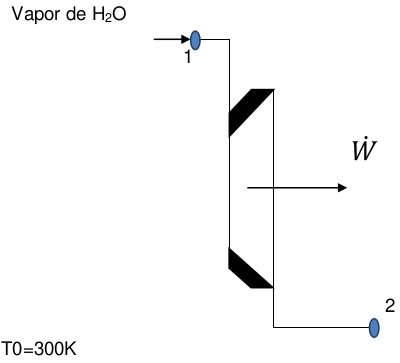

## Solución

In [ ]:
# Datos:

### Punto 1
Con $P = 30 \; \mathrm{bar}$, y $T=320^\circ \mathrm{C}$

In [ ]:
# De tabla
h_1 = 3045.44 # [kJ/kg]
s_1 = 6.62854 # [kJ/kg]

### Punto 2    
$P = 0,14 \; bar \quad \rightarrow \quad s', \; s'', \;h', \; h'' \quad \rightarrow \quad x_{2rev}, \; h_{2rev}$

In [ ]:
# Con P_2 = 0.14 bar, de tabla
hp_2  =  220.02 # [kJ/kg]
hpp_2 = 2596.71 # [kJ/kg]
sp_2  = 0.73669 # [kJ/kg]
spp_2 = 8.03338 # [kJ/kg]

In [ ]:
s_2rev = s_1

$$s_{2rev} = s_1$$

$$x_{2Rev} = \frac{s_{2Rev} - s'}{s'' - s'}$$

In [ ]:
x_2rev = (s_2rev - sp_2)/(spp_2 - sp_2)

In [ ]:
print("x_2rev = %.3f"%x_2rev)

x_2rev = 0.807


$$h_{2rev} = x_{2rev} (h''_2 - h'_2) + h'_2$$

In [ ]:
h_2rev = x_2rev*(hpp_2 - hp_2) + hp_2

$$\eta_{iso} = 0,75 = \frac{W}{W_{Rev}}$$

$$W = \eta_{iso} W_{rev}$$

$$\underbrace{Q}_{=0} - W = \Delta H$$

$$W_{Rev} = m (h_1 - h_{2rev})$$

$$W = -\Delta H = m(h_1 - h_2)$$

$$h_2 = h_1 - \frac{W}{m}$$

$$x_2 = \frac{h_2 - h'}{h'' - h'}$$

In [ ]:
# Temperatura ambiento
T_0 = 300 # [K]
# Caudal másico
m = 10 # [kg/s]
# Rendimiento isoentrópico
η_iso = 0.75
# Trabajo reversible
W_rev = m*(h_1 - h_2rev)
# Trabajo
W = η_iso*W_rev
# Entropía en 2
h_2 = h_1 - W/m
# Estado vapor en 2
x_2 = (h_2 - hp_2)/(hpp_2 - hp_2)
# Entropía en  2
s_2 = x_2*(spp_2 - sp_2) + sp_2
# Variación de entropía del universo
ΔS_u = m*(s_2 - s_1)
# Trabajo perdido
W_perd = T_0*ΔS_u

In [ ]:
print("W = %.2f [W]"%W)
print("ΔS_u = %.5f [kW/K]"%ΔS_u)
print("W_perd = %.3f [W]"%W_perd)

W = 6797.38 [W]
ΔS_u = 6.95622 [kW/K]
W_perd = 2086.866 [W]


$$\Delta S_u = \Delta S_{Turb} = \Delta_{1-2} = m(s_2 - s_1)$$

$$\dot{W}_{perd} = T_0 \cdot \Delta S_u$$

In [ ]:
%reset -s -f

---

In [ ]:
!pip install CoolProp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 27.0 MB/s eta 0:00:00


In [ ]:
# Datos:
P_1 = 30e5 # [Pa]
T_1 = 320+273.15 # [K]
m_1 = 10 # [kg/s]
P_2 = 0.14e5 # [Pa]
η_iso = 0.75
T_0 = 300 # [K]

In [ ]:
import CoolProp.CoolProp as cp

### 1) Potencia

In [ ]:
# En el punto 1
# Con P_1 y T_1
h_1 = cp.PropsSI("H",'P',P_1,'T',T_1,'Water')
s_1 = cp.PropsSI("S",'P',P_1,'T',T_1,'Water')

In [ ]:
print("h_1 = %.2f [kJ/kg]"%(h_1/1000))
print("s_1 = %.5f [kJ/kg]"%(s_1/1000))

h_1 = 3044.15 [kJ/kg]
s_1 = 6.62664 [kJ/kg]


Considerando
$$s_1 = s_{2rev}$$

In [ ]:
s_2rev = s_1
cp.PhaseSI('P',P_2,'S',s_2rev,'Water')

'twophase'

$$x_{2rev} = \frac{s_{2rev} - s'_2}{s''_2 - s'_2}$$

In [ ]:
# Calculamos x_2
sp_2 = cp.PropsSI('S','P',P_2,'Q',0,'Water')   # s'  (líq saturado)
spp_2 = cp.PropsSI('S','P',P_2,'Q',1,'Water')  # s'' (vap saturado)

x_2rev = (s_2rev - sp_2)/(spp_2 - sp_2)

In [ ]:
print("x_2rev = %.3f"%x_2rev)

x_2rev = 0.807


In [ ]:
cp.PropsSI('Q','P',P_2,'S',s_2rev,'Water')

0.8074610978872369

In [ ]:
hp_2 = cp.PropsSI('H','P',P_2,'Q',0,'Water')   # h'  (líq saturado)
hpp_2 = cp.PropsSI('H','P',P_2,'Q',1,'Water')  # h'' (vap saturado)

In [ ]:
h_2rev = x_2rev*(hpp_2 - hp_2) + hp_2

$$\dot{W}_{rev} = \dot{m} (h_1 - h_{2rev})$$

$$\dot{W} = \eta_{iso} W_{rev}$$

In [ ]:
W_rev = m_1*(h_1 - h_2rev)
# Potencia
W = η_iso*W_rev

In [ ]:
#@title Resultado
print("Potencia")
print("W = %.3f [kW]"%(W/1000))

Potencia
W = 6793.514 [kW]


---
### 2) $\Delta S_u$

$$\dot{W} = \dot{m} (h_1 - h_2)$$

$$h_2 = h_1 - \frac{\dot{W}}{\dot{m}}$$

In [ ]:
h_2 = h_1 - W/m_1

In [ ]:
x_2 = (h_2 - hp_2)/(hpp_2 - hp_2)

In [ ]:
print("x_2 = %.3f"%x_2)

x_2 = 0.903


In [ ]:
s_2 = x_2*(spp_2 - sp_2) + sp_2

In [ ]:
print("s_2 = %.3f [kJ/(kg·K)]"%(s_2/1000))

s_2 = 7.322 [kJ/(kg·K)]


In [ ]:
ΔS_u = m_1*(s_2 - s_1)

In [ ]:
#@title Resultado
print("Variación de entropía del universo")
print("ΔS_u = %.3f [kW/K]"%(ΔS_u/1000))

Variación de entropía del universo
ΔS_u = 6.953 [kW/K]


---
### 3) Trabajo perdido
$$\dot{W}_{perd} = T_0 \cdot \Delta S_u$$

In [ ]:
W_perd = T_0*ΔS_u

In [ ]:
#@title Resultado
print("Trabajo perdido")
print("W_perd = %.1f [kJ/s]"%(W_perd/1000))

Trabajo perdido
W_perd = 2085.8 [kJ/s]
